# Introduction to Statistical Analysis in Python: EDA, Visualization, and Inference

## Introduction

In this notebook, we will explore statistical analysis using Python, focusing on three critical components: **Exploratory Data Analysis (EDA)**, **Data Visualization**, and **Statistical Inference**. We'll use Python's most powerful data analysis libraries: **pandas** for data manipulation, **matplotlib** and **seaborn** for static visualization, **plotly** for interactive graphics, **scipy** for statistical testing, and **statsmodels** for regression analysis.

## Learning Outcomes

### Exploratory Data Analysis (EDA)
- Load, inspect, and clean datasets; create derived variables and demographic indicators
- Perform comprehensive analysis (univariate, bivariate, multivariate) and handle outliers

### Data Visualization
- Master matplotlib, seaborn, and plotly for statistical and interactive visualizations
- Apply best practices to create publication-ready, multi-panel graphics

### Statistical Inference
- Formulate and test hypotheses using scipy and statsmodels; perform common statistical tests
,Build multiple linear regression models, calculate confidence intervals, and check assumptions


## Dataset Description
This dataset was created by combining population density data and building footprints. The population density data is age-group specific from Meta. The building footprints were downloaded from Google's Open Buildings dataset. To generate the data at cell-level, I utilized GIS packages in Python. You will learn about this processing in the next session when we cover Module 3 (Spatial Data Processing).

**Dataset Overview:**
- **Original population density data:** [Gridded Population Density by Age Group](https://drive.google.com/file/d/10ReitvO0LWFT6CnuJEHZzJZGG3WdL75j/view?usp=share_link)
- **Building Footprints:** [Google Open Buildings](https://sites.research.google/gr/open-buildings/#open-buildings-download)
- **Download link:** [Download data file from here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=sharing)


### Variable Descriptions

#### Geographic Identifiers
| Variable | Type | Description |
|----------|------|-------------|
| `cell_id` | String | Unique identifier for each administrative cell |
| `province_name` | String | Province name (5 provinces: Kigali, Eastern, Western, Northern, Southern) |
| `district_name` | String | District name within province (30 districts total) |
| `sector_name` | String | Sector name within district (administrative subdivision) |
| `cell_name` | String | Cell name (smallest administrative unit) |

#### Demographic Variables (2020 Population Estimates)
| Variable | Description |
|----------|-------------|
| `general_2020` | Total population in the cell |
| `elderly_60_plus_2020` | Population aged 60 years and above |
| `children_under_five_2020` | Population under 5 years of age |
| `youth_15_24_2020` | Population aged 15-24 years |
| `men_2020` | Male total_pop |
| `women_2020` | Female population |

#### Infrastructure Variable
| Variable | Type | Description |
|----------|------|-------------|
| `building_count` | Float | Number of buildings/structures in the cell |

# Import Required Packages

In [29]:
# pip install seaborn scipy

In [30]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [31]:
import os
os.listdir(Path.cwd().parents[0] / "data" / "population")

['Icon\r', 'rw-pop-density-gridded', 'rwa-cell-pop.csv']

In [32]:
DIR_DATA = Path.cwd().parents[0] / "data"
FILE_CELL_POP = DIR_DATA / "population" / "rwa-cell-pop.csv"
df = pd.read_csv(FILE_CELL_POP)

In [33]:
df.head()

,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0


# 1. EXPLOLATORY DATA ANALYSIS 

# 1.1 Data Cleaning and Preprocessing

TASK-0: Load the dataset and inspect its structure.

TASK-1: The column names with '_2020' suffix are verbose and hard to work with. 
Rename them to be more concise and readable.

INSTRUCTIONS:
1. Create a dictionary that maps old column names to new names
2. Use pandas .rename() method to rename the columns
3. Print the new column names to verify the changes

NEW VARIABLE NAMES TO USE:
- 'general_2020' : 'total_pop'
- 'elderly_60_plus_2020' : 'elderly_pop'
- 'children_under_five_2020' : 'children_pop'
- 'youth_15_24_2020' : 'youth_pop'
- 'men_2020' : 'male_pop'
- 'women_2020' : 'female_pop'

TASK-2: Create meaningful demographic indicators from the population data.

PART A: BASIC POPULATION MEASURES
Create these variables using the NEW column names:
1. 'population' ,total population (alias for clarity)
2. 'gender_ratio' ,men per 100 women (male_pop / female_pop * 100)
3. 'density_proxy' ,people per building (population / building_count)

PART B: AGE STRUCTURE PROPORTIONS (as decimals 0-1, not percentages)
1. 'pct_elderly' ,proportion of elderly population
2. 'pct_children' - proportion of children population
3. 'pct_youth' - proportion of youth population

PART C: DEMOGRAPHIC INDICATORS
1. 'dependency_ratio' - (children + elderly) / working age population
  Note: working age = total - children - elderly

## 1.2. Univariate Analysis
- Summary statistics
- Histograms and basic charts for single variables 

### Renaming columns

In [34]:
new_columns = {
    'general_2020' : 'total_pop',
    'elderly_60_plus_2020' : 'elderly_pop',
    'children_under_five_2020' : 'children_pop',
    'youth_15_24_2020' : 'youth_pop',
    'men_2020' : 'male_pop',
    'women_2020' : 'female_pop'
}

df.rename(columns=new_columns, inplace=True)

In [35]:
# GENDER RATIO
df['gender_ratio'] = df['male_pop'] / df['female_pop']

# PEOPLE PER BUILDING
df['people_per_building'] = df['total_pop'] / df['building_count']

# PERCENT OF ELDERLY POPULATION
df['elderly_pct'] = (df['elderly_pop'] / df['total_pop']) * 100

# PERCENT OF CHILDREN POPULATION
df['children_pct'] = (df['children_pop'] / df['total_pop']) * 100

# PERCENT OF YOUTH POPULATION
df['youth_pct'] = (df['youth_pop'] / df['total_pop']) * 100

Descriptive statistics for population variables:
       total_pop  elderly_pop  children_pop  youth_pop  male_pop  female_pop  \
count    2169.00      2169.00       2169.00    2169.00   2169.00     2169.00   
mean     5960.32       282.05        881.96    1214.86   2879.67     3080.65   
std      4293.64       156.46        655.96     980.26   2196.67     2107.22   
min         6.66         0.34          0.91       1.38      3.13        3.53   
25%      3451.96       181.39        480.75     691.86   1634.18     1807.98   
50%      4982.33       254.72        729.09     985.44   2363.86     2605.45   
75%      7076.69       349.36       1075.26    1422.11   3380.28     3705.96   
max     70171.21      1471.00      10356.85   17588.08  37017.92    33153.29   

       building_count  
count         2169.00  
mean          1247.16  
std            852.29  
min              0.00  
25%            714.00  
50%           1027.00  
75%           1512.00  
max           9168.00  

Distribution 

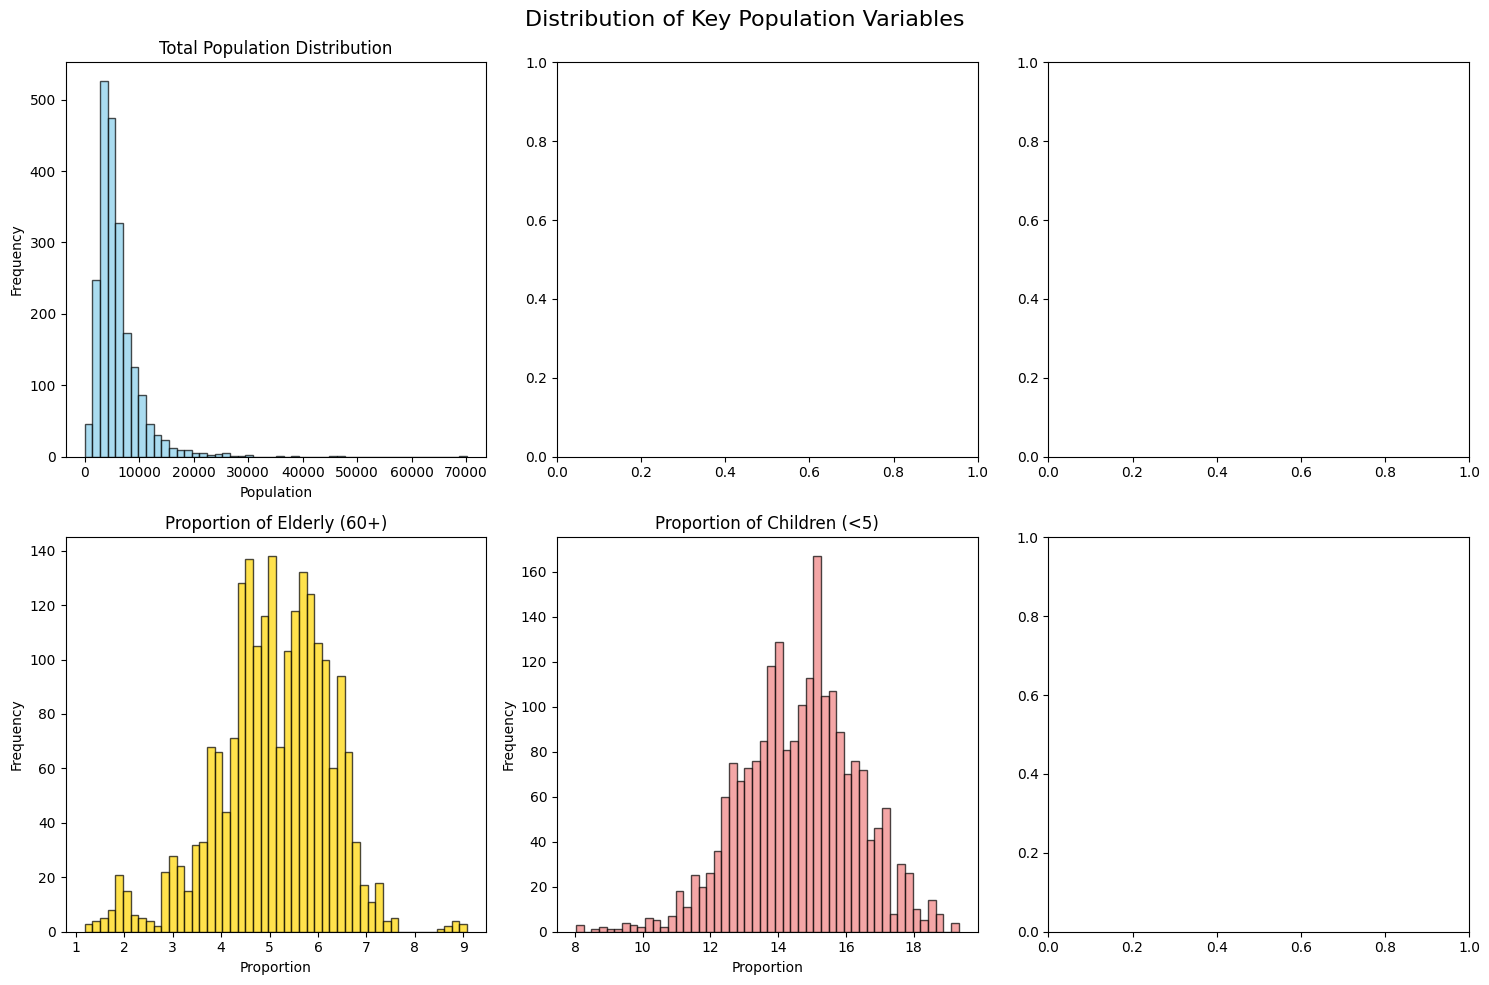

In [36]:
# Descriptive statistics for population variables
pop_columns = ['total_pop', 'elderly_pop', 'children_pop', 
               'youth_pop', 'male_pop', 'female_pop', 'building_count']

print("Descriptive statistics for population variables:")
desc_stats = df[pop_columns].describe()
print(desc_stats.round(2))

# Distribution analysis
print("\nDistribution characteristics:")
for col in ['total_pop', 'gender_ratio', 'people_per_building']:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Skewness: {df[col].skew():.2f}")
        print(f"  Kurtosis: {df[col].kurtosis():.2f}")

# Visualization of key distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Population Variables', fontsize=16)

# Total population distribution
axes[0,0].hist(df['total_pop'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Total Population Distribution')
axes[0,0].set_xlabel('Population')
axes[0,0].set_ylabel('Frequency')


# Age proportions
axes[1,0].hist(df['elderly_pct'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1,0].set_title('Proportion of Elderly (60+)')
axes[1,0].set_xlabel('Proportion')
axes[1,0].set_ylabel('Frequency')

# Children proportion
axes[1,1].hist(df['children_pct'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,1].set_title('Proportion of Children (<5)')
axes[1,1].set_xlabel('Proportion')
axes[1,1].set_ylabel('Frequency')

# People per building
# axes[1,2].hist(df['people_per_building'], bins=50, alpha=0.7, color='mediumpurple', edgecolor='black')
# axes[1,2].set_title('People per Building')
# axes[1,2].set_xlabel('People/Building')
# axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**EXERCISE-1: CREATE MORE PLOTS FOR THE FOLLOWING VARIABLES**
-  children_pct
- bulding_count

## 1.3. Bivariate Analysis
- Summary statistics
- Histograms and basic charts for single variables 

In [37]:
# def dependency_ratio(row):
#     """
#     Calculate the dependency ratio for each cell in the DataFrame.

#     The dependency ratio is calculated as:
#     (elderly population + children population) / working-age population
#     """
#     # Calculate working-age population
#     working_age_pop = row['population'] - (row['elderly_pop'] + row['children_pop'])

#     # Population dependent on working-age population
#     pop_dep = row['elderly_pop'] + row['children_pop']

#     # Avoid division by zero
#     if working_age_pop == 0:
#         return 0

#     # Calculate dependency ratio
#     dep_ratio = pop_dep / working_age_pop

#     return dep_ratio

In [38]:
df["dep_ratio"] = df.apply(lambda row: (row["children_pop"] + row["elderly_pop"])/(row["total_pop"] -\
    (row["children_pop"] + row["elderly_pop"])), axis = 1)

In [39]:
df.head()

,cell_id,province_name,district_name,sector_name,cell_name,elderly_pop,total_pop,children_pop,youth_pop,male_pop,female_pop,building_count,gender_ratio,people_per_building,elderly_pct,children_pct,youth_pct,dep_ratio
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,0.923088,2.686846,6.268592,12.849352,19.662033,0.236368
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,0.923355,4.150598,6.257933,12.827435,19.647618,0.235870
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0,0.923248,3.314397,6.245970,12.819357,19.644048,0.235564
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0,0.922183,3.422075,6.147175,12.880013,19.637254,0.234982
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0,0.909814,2.969783,5.556571,13.793053,20.916581,0.239920


Correlation matrix for key variables:
                     total_pop  elderly_pct  children_pct  youth_pct  \
total_pop                1.000       -0.418         0.148      0.165   
elderly_pct             -0.418        1.000        -0.336     -0.461   
children_pct             0.148       -0.336         1.000     -0.405   
youth_pct                0.165       -0.461        -0.405      1.000   
gender_ratio             0.337       -0.352        -0.238      0.382   
people_per_building      0.336       -0.158         0.043      0.037   
dep_ratio               -0.132        0.332         0.776     -0.708   

                     gender_ratio  people_per_building  dep_ratio  
total_pop                   0.337                0.336     -0.132  
elderly_pct                -0.352               -0.158      0.332  
children_pct               -0.238                0.043      0.776  
youth_pct                   0.382                0.037     -0.708  
gender_ratio                1.000            

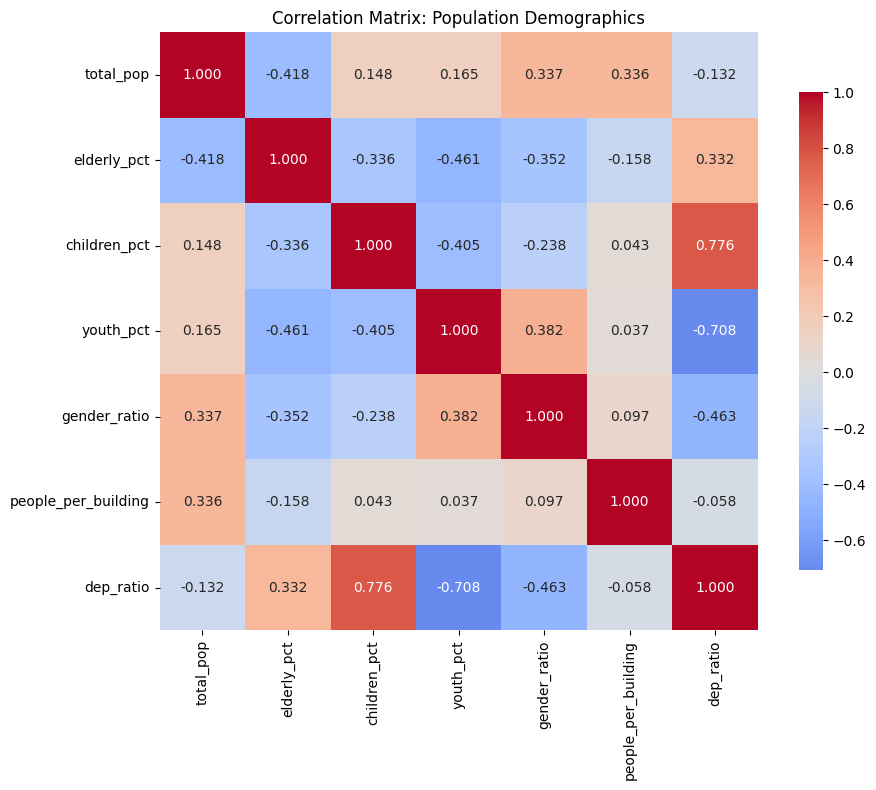


Population distribution by administrative levels:
By Province:
                 Total_Pop  Avg_Cell_Pop  Cell_Count
province_name                                       
Iburasirazuba   3649941.06       7199.09         507
Amajyepfo       3023606.50       5651.60         535
Iburengerazuba  2793012.67       5078.20         550
Amajyaruguru    1850932.72       4449.36         416
UmujyiwaKigali  1610445.06      10002.76         161


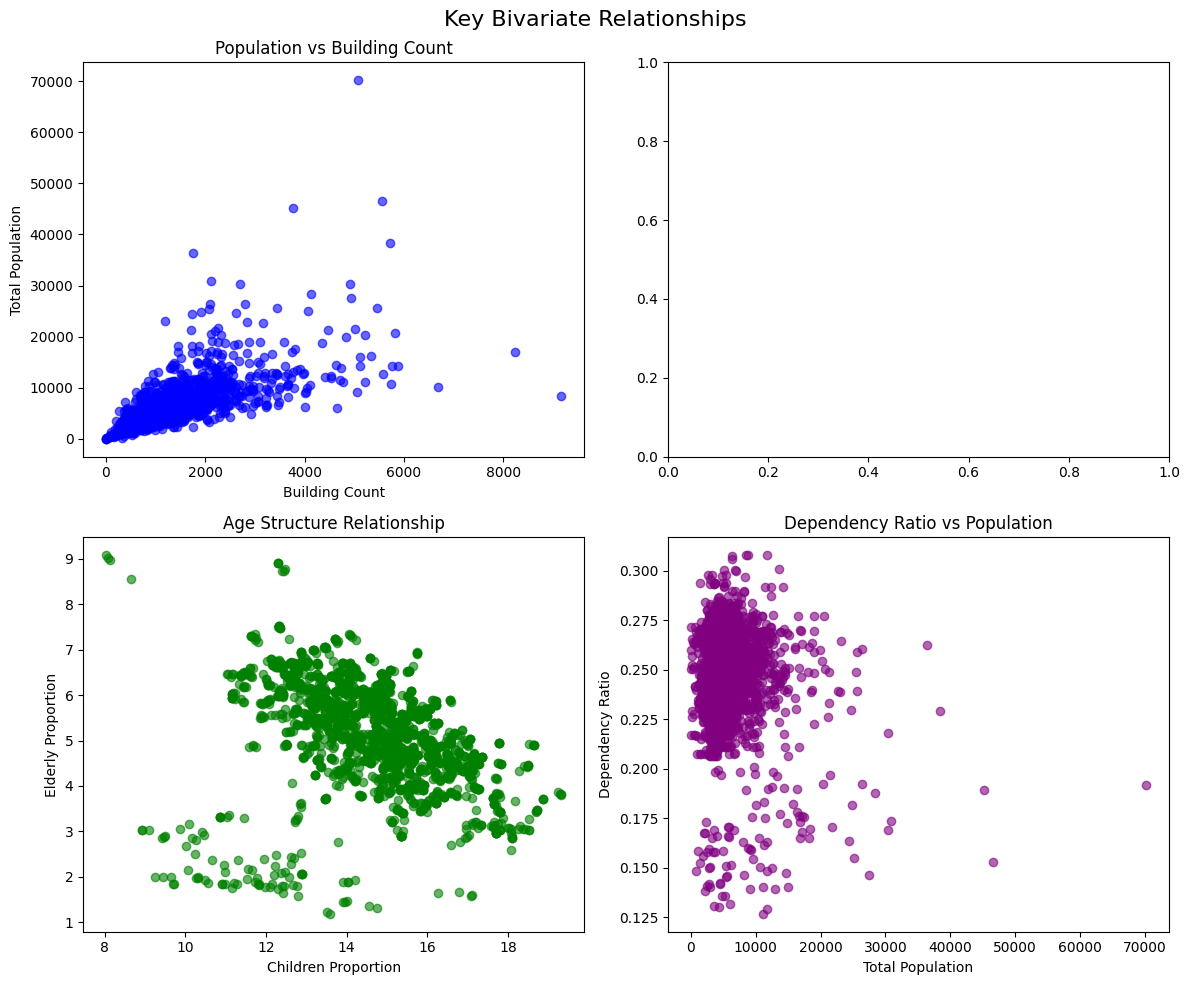

In [44]:
# Correlation analysis
print("Correlation matrix for key variables:")
corr_vars = ['total_pop', 'elderly_pct', 'children_pct', 
             'youth_pct', 'gender_ratio', 'people_per_building', 'dep_ratio']
correlation_matrix = df[corr_vars].corr()
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: Population Demographics')
plt.tight_layout()
plt.show()

# Population by administrative level
print("\nPopulation distribution by administrative levels:")

# By Province
province_pop = df.groupby('province_name')['total_pop'].agg(['sum', 'mean', 'count']).round(2)
province_pop.columns = ['Total_Pop', 'Avg_Cell_Pop', 'Cell_Count']
print("By Province:")
print(province_pop.sort_values('Total_Pop', ascending=False))

# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Key Bivariate Relationships', fontsize=16)

# Population vs Building Count
axes[0,0].scatter(df['building_count'], df['total_pop'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Building Count')
axes[0,0].set_ylabel('Total Population')
axes[0,0].set_title('Population vs Building Count')


# Children vs Elderly proportions
axes[1,0].scatter(df['children_pct'], df['elderly_pct'], alpha=0.6, color='green')
axes[1,0].set_xlabel('Children Proportion')
axes[1,0].set_ylabel('Elderly Proportion')
axes[1,0].set_title('Age Structure Relationship')

# Dependency ratio vs Population
axes[1,1].scatter(df['total_pop'], df['dep_ratio'], alpha=0.6, color='purple')
axes[1,1].set_xlabel('Total Population')
axes[1,1].set_ylabel('Dependency Ratio')
axes[1,1].set_title('Dependency Ratio vs Population')

plt.tight_layout()
plt.show()

## EXERCISE 2: Correlation Analysis 
- create a correlation matrix using: Use these variables: ```total_pop, elderly_pct, children_pct, youth_pct, gender_ratio, dep_ratio```
- Dispaly the matrix as a heatmap


<Axes: >

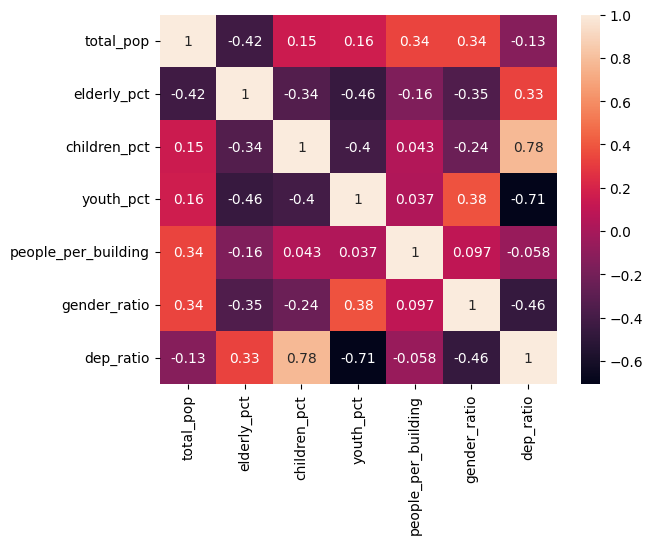

In [55]:
corr_mat = df[['total_pop', 'elderly_pct', 'children_pct', 'youth_pct', 'people_per_building', 'gender_ratio', 'dep_ratio']].\
    corr()
sns.heatmap(corr_mat, annot=True)

In [85]:
df.loc[:, 'province_name'].unique()

array(['Amajyaruguru', 'Amajyepfo', 'Iburasirazuba', 'Iburengerazuba',
       'UmujyiwaKigali'], dtype=object)

In [88]:
replacements = {
    'Amajyaruguru':'Northen', 
    'UmujyiwaKigali':'Kigali', 
    'Amajyepfo':'Southen',
    'Iburasirazuba':'Eastern',
    'Iburengerazuba':'Western'
    
}

df.loc[:, 'province_name'] = df.loc[:, 'province_name'].replace(replacements)

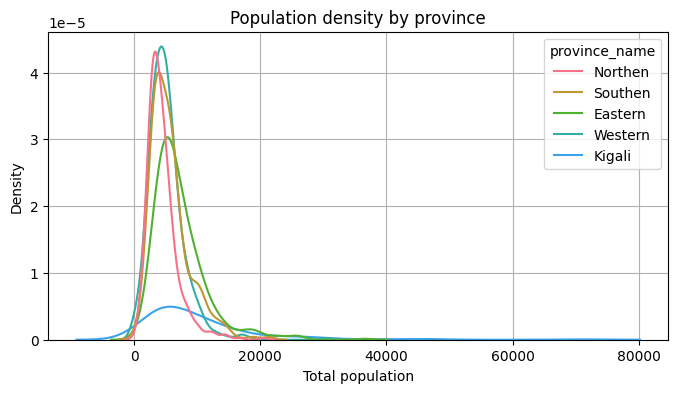

In [89]:
plt.figure(figsize=(8, 4))
sns.kdeplot(x='total_pop', data=df, hue='province_name')
plt.xlabel("Total population")
plt.title("Population density by province")
plt.grid()
plt.show()
# df.columns

## 1.3 Multivariate Exploration

**EXERCISE-3: CREATE CATEGORIAL VARIABLE FOR POPULATION**
- Use quantiles to understand population distribution. Check ```pd.qcut`` function on how to create categorial variable with quantiles
- Lets call this variable ```'pop_category'```

In [48]:
df['pop_category'] = pd.qcut(df['total_pop'], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])
df['pop_category'].value_counts()

pop_category
Very Low     543
Low          542
High         542
Very High    542
Name: count, dtype: int64

In [56]:
# =====================================
# CROSS TABULATION 1: Province vs Population Size
# =====================================
print("\n1. CROSS TABULATION: Province vs Population Size Categories")
print("-" * 60)

crosstab1 = pd.crosstab(df['province_name'], df['pop_category'], margins=True)
print("Frequency Table:")
print(crosstab1)

print("\nPercentage by Province (Row Percentages):")
crosstab1_pct = pd.crosstab(df['province_name'], df['pop_category'], 
                           normalize='index') * 100
print(crosstab1_pct.round(1))

print("\nPercentage by Population Size (Column Percentages):")
crosstab1_col_pct = pd.crosstab(df['province_name'], df['pop_category'], 
                               normalize='columns') * 100
print(crosstab1_col_pct.round(1))




1. CROSS TABULATION: Province vs Population Size Categories
------------------------------------------------------------
Frequency Table:
pop_category    Very Low  Low  High  Very High   All
province_name                                       
Amajyaruguru         166  128    76         46   416
Amajyepfo            132  133   151        119   535
Iburasirazuba         63  103   141        200   507
Iburengerazuba       157  150   149         94   550
UmujyiwaKigali        25   28    25         83   161
All                  543  542   542        542  2169

Percentage by Province (Row Percentages):
pop_category    Very Low   Low  High  Very High
province_name                                  
Amajyaruguru        39.9  30.8  18.3       11.1
Amajyepfo           24.7  24.9  28.2       22.2
Iburasirazuba       12.4  20.3  27.8       39.4
Iburengerazuba      28.5  27.3  27.1       17.1
UmujyiwaKigali      15.5  17.4  15.5       51.6

Percentage by Population Size (Column Percentages):
pop_c

# 2. Static Visualizations


1. ESSENTIAL MATPLOTLIB PLOTS
----------------------------------------


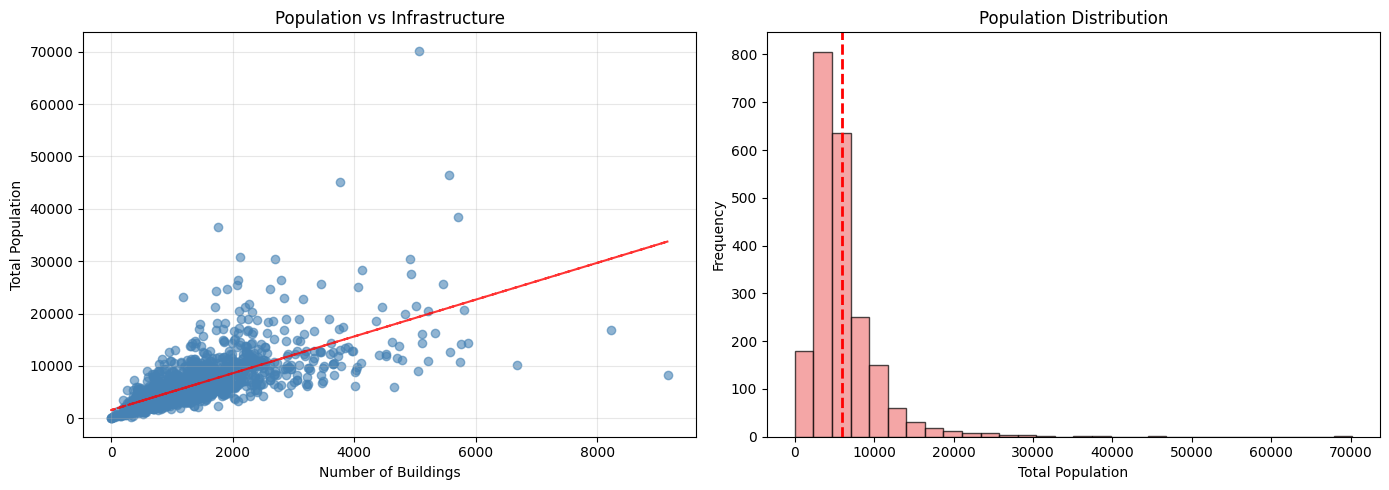

In [57]:
# ==========================================
# 1. ESSENTIAL MATPLOTLIB PLOTS 
# ========================================

print("\n1. ESSENTIAL MATPLOTLIB PLOTS")
print("-" * 40)

# Basic scatter plot with customization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Population vs Buildings
ax1.scatter(df['building_count'], df['total_pop'], alpha=0.6, color='steelblue')
ax1.set_xlabel('Number of Buildings')
ax1.set_ylabel('Total Population')
ax1.set_title('Population vs Infrastructure')
ax1.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['building_count'], df['total_pop'], 1)
p = np.poly1d(z)
ax1.plot(df['building_count'], p(df['building_count']), "r--", alpha=0.8)

# Plot 2: Distribution
ax2.hist(df['total_pop'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(df['total_pop'].mean(), color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Total Population')
ax2.set_ylabel('Frequency')
ax2.set_title('Population Distribution')

plt.tight_layout()
plt.show()

In [60]:
# Correlation heatmap
corr_vars = ['total_pop', 'elderly_pct', 'children_pct', 'gender_ratio']
correlation_matrix = df[corr_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=axes[1,0])
axes[1,0].set_title('Correlation Heatmap')

# Scatter plot with regression
sns.scatterplot(data=df, x='elderly_pct', y='children_pct', 
                hue='province_name', ax=axes[1,1])
sns.regplot(data=df, x='elderly_pct', y='children_pct', 
            scatter=False, ax=axes[1,1], color='red')
axes[1,1].set_title('Age Structure Relationship')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# 3. Inference and Basic Modelling

## 3.1 Hypothesis Testing

In [62]:

print("\n1. HYPOTHESIS TESTING")
print("-" * 30)

# One-sample t-test: Is gender ratio significantly different from 100?
print("ONE-SAMPLE T-TEST: Gender Ratio vs Population Parity (100)")
print("-" * 50)

t_stat, p_value = stats.ttest_1samp(df['gender_ratio'], 100)
mean_ratio = df['gender_ratio'].mean()

print(f"Sample mean: {mean_ratio:.2f}")
print(f"Test statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Result: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'} (α = 0.05)")
print(f"Interpretation: Gender ratio is {'significantly different from' if p_value < 0.05 else 'not significantly different from'} 100")

# Two-sample t-test: Compare children proportion between two largest provinces
print(f"\nTWO-SAMPLE T-TEST: Children Proportion Comparison")
print("-" * 50)

# Get two largest provinces by number of cells
province_counts = df['province_name'].value_counts()
prov1, prov2 = province_counts.index[:2]

group1 = df[df['province_name'] == prov1]['children_pct']
group2 = df[df['province_name'] == prov2]['children_pct']

t_stat2, p_value2 = stats.ttest_ind(group1, group2)

print(f"Comparing: {prov1} vs {prov2}")
print(f"{prov1} mean: {group1.mean():.3f} (n={len(group1)})")
print(f"{prov2} mean: {group2.mean():.3f} (n={len(group2)})")
print(f"t-statistic: {t_stat2:.3f}")
print(f"P-value: {p_value2:.4f}")
print(f"Result: {'Significant difference' if p_value2 < 0.05 else 'No significant difference'}")

# Chi-square test: Association between province and population size category
print(f"\nCHI-SQUARE TEST: Province vs Population Size")
print("-" * 50)

# Create population size categories
df['pop_category'] = pd.cut(df['total_pop'], 
                           bins=[0, 1000, 3000, float('inf')], 
                           labels=['Small', 'Medium', 'Large'])

# Create contingency table
contingency_table = pd.crosstab(df['province_name'], df['pop_category'])
print("Contingency Table:")
print(contingency_table)

chi2, p_val_chi, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2:.3f}")
print(f"P-value: {p_val_chi:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Result: {'Significant association' if p_val_chi < 0.05 else 'No significant association'}")



1. HYPOTHESIS TESTING
------------------------------
ONE-SAMPLE T-TEST: Gender Ratio vs Population Parity (100)
--------------------------------------------------
Sample mean: 0.92
Test statistic: -64201.359
P-value: 0.0000
Result: Reject H0 (α = 0.05)
Interpretation: Gender ratio is significantly different from 100

TWO-SAMPLE T-TEST: Children Proportion Comparison
--------------------------------------------------
Comparing: Iburengerazuba vs Amajyepfo
Iburengerazuba mean: 15.144 (n=550)
Amajyepfo mean: 14.279 (n=535)
t-statistic: 9.988
P-value: 0.0000
Result: Significant difference

CHI-SQUARE TEST: Province vs Population Size
--------------------------------------------------
Contingency Table:
pop_category    Small  Medium  Large
province_name                       
Amajyaruguru        3     112    301
Amajyepfo           6      77    452
Iburasirazuba       4      35    468
Iburengerazuba     14      98    438
UmujyiwaKigali      1      17    143

Chi-square statistic: 85.433
P-

## 3.2 Regression with StatsModels

In [65]:
# pip install --upgrade statsmodels

In [99]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [100]:

# Simple linear regression
print("SIMPLE LINEAR REGRESSION")
print("-" * 25)

# Predict total population from building count
X = df['building_count']
y = df['total_pop']

# Add constant for intercept
X_with_const = sm.add_constant(X)
model_simple = sm.OLS(y, X_with_const).fit()

print("Model: Total Population ~ Building Count")
print(f"R-squared: {model_simple.rsquared:.3f}")
print(f"Coefficient (slope): {model_simple.params[1]:.2f}")
print(f"P-value for slope: {model_simple.pvalues[1]:.4f}")
print(f"Interpretation: Each additional building is associated with {model_simple.params[1]:.1f} more people")

# Multiple linear regression using statsmodels formula API
print(f"\nMULTIPLE LINEAR REGRESSION")
print("-" * 25)

# Predict dependency ratio from multiple factors
formula = 'dep_ratio ~ children_pct + elderly_pct + C(province_name)'
model_multiple = smf.ols(formula, data=df).fit()

print("Model: Dependency Ratio ~ Children % + Elderly % + Province")
print(f"R-squared: {model_multiple.rsquared:.3f}")
print(f"Adjusted R-squared: {model_multiple.rsquared_adj:.3f}")
print(f"F-statistic p-value: {model_multiple.f_pvalue:.4f}")

print("\nKey Coefficients:")
coeffs = model_multiple.params
pvals = model_multiple.pvalues
for var in ['children_proportion', 'elderly_proportion']:
    if var in coeffs:
        print(f"  {var}: {coeffs[var]:.3f} (p={pvals[var]:.4f})")

print(f"\nModel Summary:")
print(f"  Variables: {len(model_multiple.params)} coefficients")
print(f"  Significant predictors: {sum(model_multiple.pvalues < 0.05)} at α=0.05")


SIMPLE LINEAR REGRESSION
-------------------------
Model: Total Population ~ Building Count
R-squared: 0.487
Coefficient (slope): 3.51
P-value for slope: 0.0000
Interpretation: Each additional building is associated with 3.5 more people

MULTIPLE LINEAR REGRESSION
-------------------------
Model: Dependency Ratio ~ Children % + Elderly % + Province
R-squared: 0.999
Adjusted R-squared: 0.999
F-statistic p-value: 0.0000

Key Coefficients:

Model Summary:
  Variables: 7 coefficients
  Significant predictors: 5 at α=0.05


In [102]:
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:              dep_ratio   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.958e+05
Date:                Fri, 01 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:58:57   Log-Likelihood:                 12154.
No. Observations:                2169   AIC:                        -2.429e+04
Df Residuals:                    2162   BIC:                        -2.425e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**EXERCISE-3: PREDICTING PEOPLE PER BUILDING FROM DEMOGRAPHIC VARIABLES**
- Build a model which uses all demographic variables to predict people per building 
- Print model summary